Topics:**Clustering using K-Means and K-medoids**. Also, find optimal K with the elbow method. Visualize the final clusters using any 2 features in the dataset

In [ ]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data
legend_data = pd.read_excel("/content/segmentation data legend.xlsx", engine='openpyxl')
segmentation_data = pd.read_csv("/content/segmentation data.csv")


In [ ]:
legend_data.head()

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of information about the ...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,ID,numerical,Integer,Shows a unique identificator of a customer.
4,NaN,NaN,NaN,NaN,NaN


In [ ]:
segmentation_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
# Display basic information about the segmentation data
print("\nSegmentation Data Info:")
print(segmentation_data.info())


Segmentation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [ ]:
# Display summary statistics of numerical features
print("\nSummary Statistics:")
print(segmentation_data.describe())


Summary Statistics:
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000

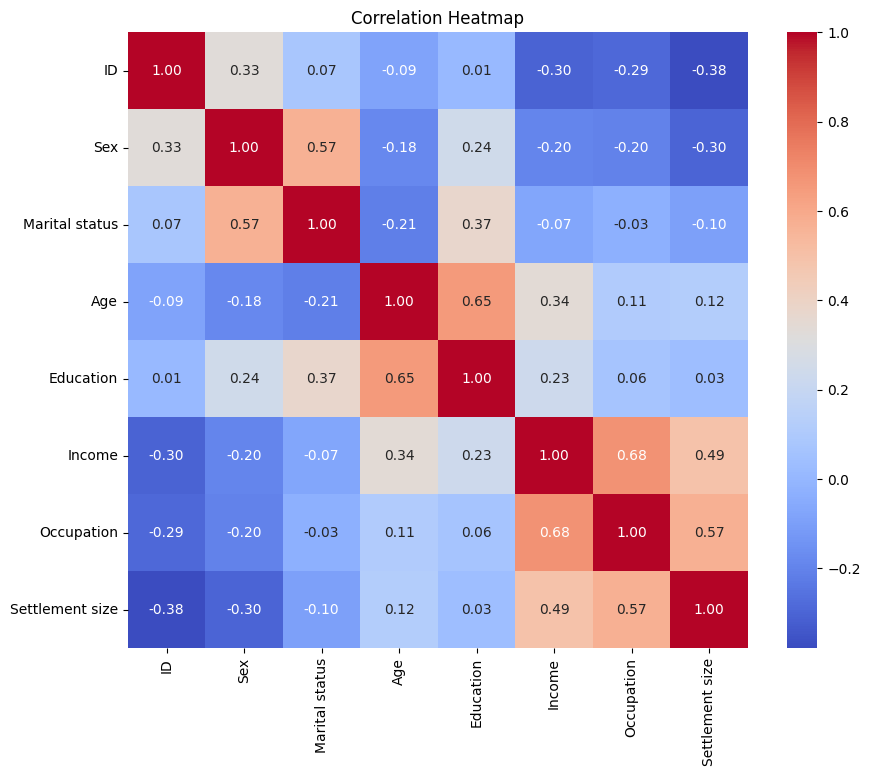

In [ ]:
# Explore correlations between numerical features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(segmentation_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

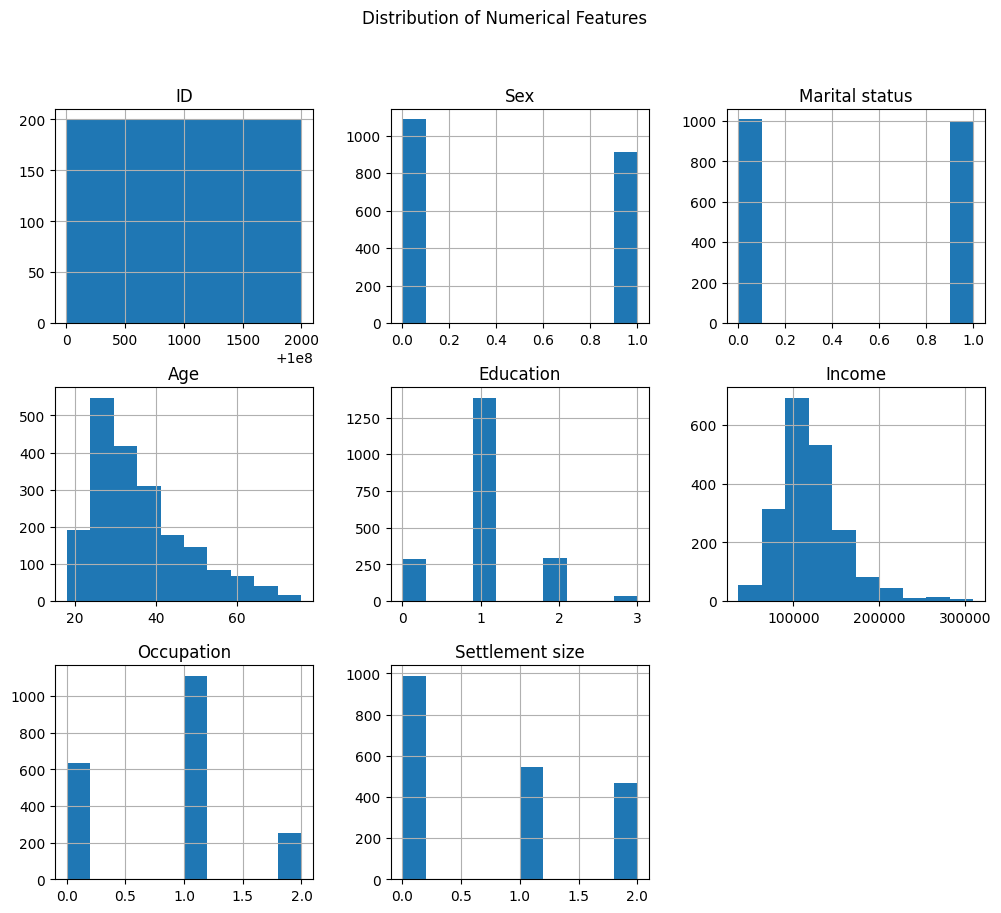

In [ ]:
# Visualize distributions of numerical features
segmentation_data.hist(figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [ ]:
# Select relevant columns for clustering
data_for_clustering = segmentation_data[['Age', 'Income']]

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

In [ ]:
# Function to calculate WCSS (within-cluster sum of squares)
def calculate_wcss(data, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
# Function to plot the elbow method
def plot_elbow(wcss, max_k=10):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()

In [ ]:
# Function to perform clustering and visualize clusters
def perform_clustering(data, k, algorithm='kmeans'):
    if algorithm == 'kmeans':
        model = KMeans(n_clusters=k, random_state=42)
    elif algorithm == 'kmedoids':
        model = KMedoids(n_clusters=k, random_state=42)
    else:
        raise ValueError("Invalid clustering algorithm. Use 'kmeans' or 'kmedoids'.")

    labels = model.fit_predict(data)
    segmentation_data['Cluster'] = labels
# Visualize clusters using two features
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Income', hue='Cluster', data=segmentation_data, palette='viridis', s=80)
    plt.title(f'Clusters - K={k}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

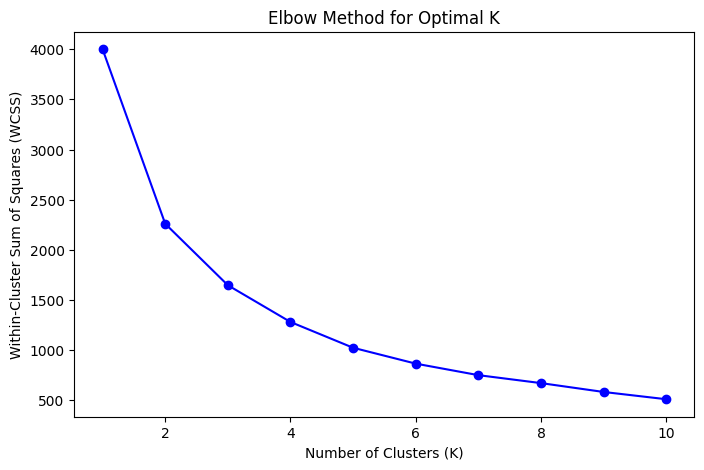

In [ ]:
# Find optimal K using elbow method
wcss_values = calculate_wcss(data_for_clustering_scaled)
plot_elbow(wcss_values)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


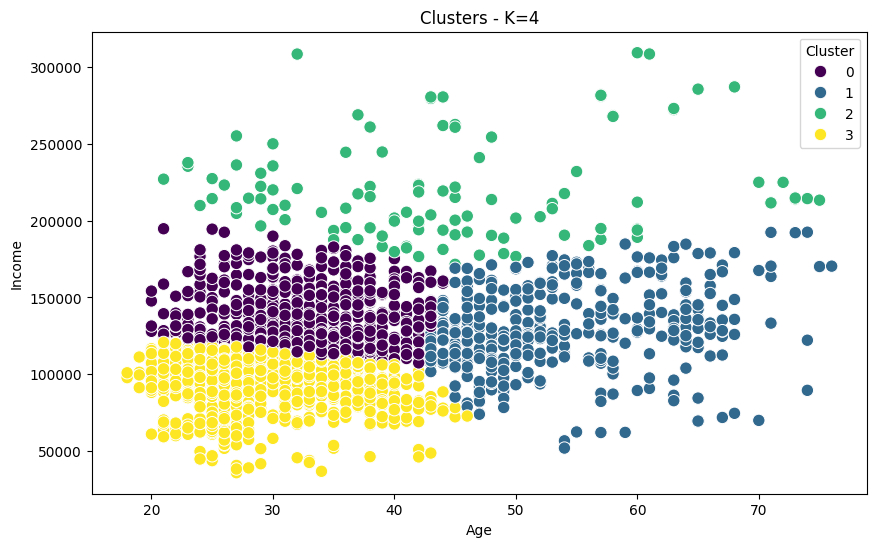

In [ ]:
# Based on the elbow plot, choose an optimal clustering
optimal_k = 4
perform_clustering(data_for_clustering_scaled, optimal_k, algorithm='kmeans')

**K-Means** aims to partition the data into K clusters, where each cluster is represented by its centroid (center)

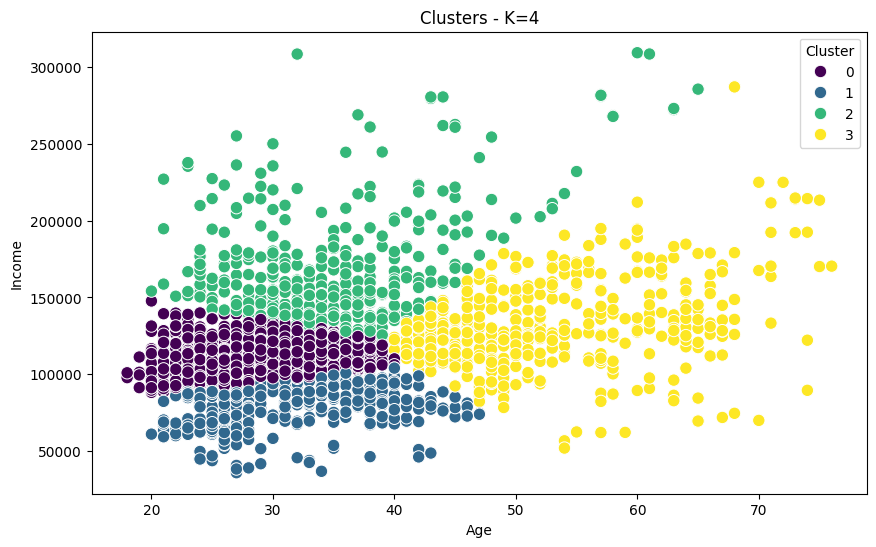

In [ ]:
optimal_k = 4
perform_clustering(data_for_clustering_scaled, optimal_k, algorithm='kmedoids')

**K-Medoids** also aims to partition the data into K clusters, but each cluster is represented by the actual data point (medoid) rather than the mean.

In [ ]:
cluster_counts = segmentation_data['Cluster'].value_counts().sort_index()
print("Count of points in each cluster:")
print(cluster_counts)